In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn import datasets

In [3]:
data = datasets.load_breast_cancer()

In [4]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
y = data['target']

In [7]:
X = pd.DataFrame(data=data['data'], columns=data['feature_names'])

In [8]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()

In [11]:
X = sc.fit_transform(X)

In [12]:
#Split the data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [15]:
#Build the logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
log_reg = LogisticRegression()

In [18]:
log_reg.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred1 = log_reg.predict(X_test)

In [20]:
from sklearn import metrics

In [21]:
print(metrics.classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        66
           1       0.97      0.99      0.98       105

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



### ROC AUC for Logistic Regression

In [22]:
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred1)

In [26]:
fpr

array([0.        , 0.04545455, 1.        ])

In [27]:
auc_score = metrics.roc_auc_score(y_test, y_pred1)

In [28]:
auc_score

0.9725108225108225

Text(0.5, 0, 'False Positive Rate')

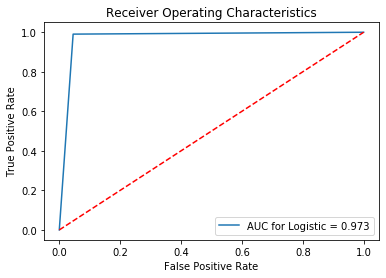

In [35]:
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, label = 'AUC for Logistic = %0.3f' % auc_score)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [36]:
from sklearn.svm import SVC

In [37]:
svc_reg = SVC(C=10, gamma=0.01)

In [38]:
svc_reg.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
y_pred2 = svc_reg.predict(X_test)

In [40]:
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        66
           1       0.98      1.00      0.99       105

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



In [41]:
print(metrics.confusion_matrix(y_test, y_pred2))

[[ 64   2]
 [  0 105]]


In [42]:
fpr2, tpr2, thr2 = metrics.roc_curve(y_test, y_pred2)

In [43]:
auc_score2 = metrics.roc_auc_score(y_test, y_pred2)

In [44]:
auc_score2

0.9848484848484849

Text(0.5, 0, 'False Positive Rate')

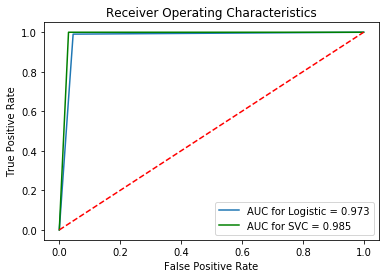

In [46]:
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, label = 'AUC for Logistic = %0.3f' % auc_score)
plt.plot(fpr2, tpr2, label = 'AUC for SVC = %0.3f' % auc_score2, color='green')
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')